# **Analisis de base de datos**

# PRIMER PASO ARRANQUE DEL PROYECTO

### CARGA DE LIBRERIAS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### INGRESO DE DATOS

**La base de datos pertenecen a una empresa de venta de zapatos en 3 departamentos de Bolivia (La Paz , Cochabamba , Santa Cruz) **


In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

ruta = "/gdrive/MyDrive/BD-Orion/ORIONSRL.xlsx"
df = pd.read_excel(ruta)

Mounted at /gdrive


In [ ]:
df

,Codigo,Material,Color,Item,Almacen,Boleta,Fecha,Hora,Marca,Cliente,T.cajas,Pares,Total($),Desc($),Pago($),Vendedor,FECHA DE INGRESO,Factura
0,5669.105,NAPA SARDENHA NEO/NOBUCK NICE GLAM,NEGRO,OFICINA,SCRZ,70889s,2022-03-08,18:50:07,MOLECA,JOSE-POMA VARGAS,1.00,12,156.96,903.00,156.96,LAURA LIZETH -ARAUZ FLORES,10-2019,ajuste-1411-SCOF-San
1,5027.1266,VERNIZ FRESH NEO/MILANO,NUDE,SCCD/OF,SCRZ,73979s,2022-05-04,08:14:08,MOLECA,YOLANDA-AQUINO,1.00,12,111.96,195.00,111.96,MAURICIO-HERNANDO ANTELO,11-2019,6920/2019 - SCOF
2,5027.1266,VERNIZ FRESH NEO/MILANO,NUDE,SCCD/OF,SCRZ,74524s,2022-05-09,18:30:01,MOLECA,LIGIA-TORREZ MARTINEZ,1.00,12,111.96,1091.00,111.96,PABLO-A-AÑEZ,11-2019,6920/2019 - SCOF
3,6408.103,VERNIZ PREMIUM,NEGRO,SCRJ/FA,SCRZ,68871s,2022-02-01,04:15:25,VIZZANO,CAROLINA-ROCHA GUZMAN,1.00,12,162.00,1418.00,162.00,DANY RICHARD-NOTA NAVARRO,11-2019,6905/2019 - SCOF
4,5679.101,TECIDO LISTRAS TOQUIO,MULTI NEGRO,SCJCB/SM,SCRZ,76084s,2022-06-02,14:43:57,MOLECA,LIGIA-TORREZ MARTINEZ,1.00,12,120.96,1949.00,120.96,PABLO-A-AÑEZ,11-2019,6905/2019 - SCOF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53688,2520.13,NAPA TURIM,NEGRO,CBMA/BC,CBBA,6710n,2023-04-04,14:58:19,MOLEKINHA,DANIEL-FERRUFINO,1.00,12,255.96,25.57,255.96,BRANDON-MONTAÑO VILLARROEL,01-2023,7772/2022 - CBOF
53689,2820.237,NAPA VERMONT NEO,NEGRO,CBMA/OF-EST,CBBA,5958n,2023-02-01,08:09:51,MOLEKINHO,ILSEN-VALENCIA,1.00,12,201.00,0.00,201.00,ALLISON YNELIA-MARCA VEIZAGA,01-2023,9585/2022 - CBOF
53690,2820.237,NAPA VERMONT NEO,NEGRO,CBMA/OF-EST,CBBA,5957n,2023-02-01,08:08:09,MOLEKINHO,LOURDES FLORENCIA-ZARATE,2.00,24,402.00,0.00,402.00,ALLISON YNELIA-MARCA VEIZAGA,01-2023,9585/2022 - CBOF
53691,2820.237,NAPA VERMONT NEO,NEGRO,CBMA/OF-EST,CBBA,5959n,2023-02-01,08:10:11,MOLEKINHO,DERECK FERNANDO -CANTUTA CALUCHO,1.00,12,201.00,0.00,201.00,ALLISON YNELIA-MARCA VEIZAGA,01-2023,9585/2022 - CBOF


# ANALISIS DE VARIABLES

In [ ]:
# Obtener información general sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53693 entries, 0 to 53692
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Codigo            53693 non-null  object 
 1   Material          53693 non-null  object 
 2   Color             53693 non-null  object 
 3   Item              53691 non-null  object 
 4   Almacen           53693 non-null  object 
 5   Boleta            53693 non-null  object 
 6   Fecha             53693 non-null  object 
 7   Hora              53693 non-null  object 
 8   Marca             53693 non-null  object 
 9   Cliente           53693 non-null  object 
 10  T.cajas           53693 non-null  float64
 11  Pares             53693 non-null  int64  
 12  Total($)          53693 non-null  float64
 13  Desc($)           53693 non-null  float64
 14  Pago($)           53693 non-null  float64
 15  Vendedor          53693 non-null  object 
 16  FECHA DE INGRESO  53693 non-null  object

**verificar que las variables correspondan al atributo**

In [ ]:
#Cambio de tipo de variables
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Codigo'] = df['Codigo'].astype(pd.StringDtype())
#df.info()

#### ANÁLISIS DE NULOS

In [ ]:
#identificar y contar los valores nulos
df.isna().sum().sort_values(ascending = False)

,0
Factura,17
Item,2
T.cajas,0
FECHA DE INGRESO,0
Vendedor,0
Pago($),0
Desc($),0
Total($),0
Pares,0
Codigo,0


Conclusiones:
TENEMOS
* 20 VALORES FALTANTES EN FACTURAS.(eliminar toda la columna puesto que no usaremos esos datos)
*  2 ITEM FALTANTES .
*  1 MATERIAL FALTANTE.

QUE SERAN  ELIMINADOS PARA NO COMPROMETER LAS MEDICIONES

In [ ]:
#Eliminar valores nulos
df = df.drop('Factura',axis=1)
df = df.drop('Hora',axis=1)
df = df.drop('Pago($)',axis=1)
df = df.drop('FECHA DE INGRESO',axis=1)
df = df.drop('T.cajas',axis=1)
df = df.dropna(subset=['Item'])
df.isna().sum().sort_values(ascending = False)

,0
Codigo,0
Material,0
Color,0
Item,0
Almacen,0
Boleta,0
Fecha,0
Marca,0
Cliente,0
Pares,0


En el siguiente paso eliminamos las filas donde habia nulos ( item y material)

In [ ]:
#Tamaño del dataset
print(df.shape)

(53691, 13)


# TIPOs DE VARIABLES

#### EDA VARIABLES CATEGÓRICAS

In [ ]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

In [ ]:
# Resumen estadístico de las variables categoricas
df.describe(include=['O'])

,Material,Color,Item,Almacen,Boleta,Marca,Cliente,Vendedor
count,53691,53691,53691,53691,53691,53691,53691,53691
unique,3037,2648,2057,3,19438,19,1289,95
top,VERNIZ PREMIUM,NEGRO,estrategicos,SCRZ,73573s,VIZZANO,JOSE LUIS -BALDERRAMA,JUAN CARLOS-BAUTISTA HERBAS
freq,7738,17528,1633,30292,219,17540,1708,3435


In [ ]:
#graficos_eda_categoricos(df.select_dtypes('O'))

Conclusiones:

* viendo los resultados en las graficas que la limpieza fue un exito
* ahora podemos utilizar para ver donde mejora para generar benificio


#### EDA VARIABLES NUMÉRICAS

In [ ]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [ ]:
# Resumen estadístico de las variables numéricas
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Pares,53691.0,10.770017,12.00,3.370238,1.00,9.00,12.00,12.00,47.00
Total($),53691.0,178.456844,173.04,84.430261,0.08,129.96,173.04,227.04,1091.88
Desc($),53691.0,781.370744,212.50,1319.181122,-881.75,18.97,212.50,907.77,12381.00


Conclusiones:

* podemos ver que en promedio la cantidad de pares son 12 ,con un total de 173,04
* hay valores extremos que debemos analizar como los malores max y minimos.


# LIMPIEZA DE DATOS

CORRECCION DE ERRORES TIPOGRAFICOS Y EQUIVALENTES

In [ ]:
# con esta parte verificamos que no haya error por duplicados o error de escritura
cols_cat = ['Total($)','Marca','Cliente']
for col in cols_cat:
    print(df[col].value_counts())
    print('-'*20)

Total($)
180.96    1465
135.96     722
165.96     625
159.96     521
158.04     482
          ... 
212.50       1
87.90        1
240.13       1
178.30       1
419.04       1
Name: count, Length: 2868, dtype: int64
--------------------
Marca
VIZZANO                 17540
BEIRARIO                 8794
MOLECA                   8022
MODARE                   5935
MOLEKINHA                5398
MOLEKINHO                3307
ACTVITTA                 1986
BR SPORT                  848
MOLECA-CARTERAS           518
VIZZANO-CARTERAS          421
MODARE-CARTERAS           364
MOLEKINHA-CARTERAS        292
ACTVITTA-CALCETINES       151
BEIRARIO-CARTERAS          63
MOLEKINHA-CALCETINES       17
COCA COLA                  11
MOLEKINHO-CALCETINES       10
MOLEKINHO-MOCHILAS          8
WEST COAST                  6
Name: count, dtype: int64
--------------------
Cliente
JOSE LUIS -BALDERRAMA             1708
JUAN-TORREZ PEREZ                 1396
BERTHA -CHOQUE ROJAS              1349
GUADALUPE RAQUEL-

In [ ]:
print(df.shape)

(53691, 13)


In [ ]:
# comprobando que no haya errores o nulos
df.isna().sum().sort_values(ascending = False)

,0
Codigo,0
Material,0
Color,0
Item,0
Almacen,0
Boleta,0
Fecha,0
Marca,0
Cliente,0
Pares,0


# BASE DE DATOS LIMPIA

In [ ]:
# Guardar el DataFrame preprocesado en un nuevo archivo Excel
df.to_excel("/gdrive/MyDrive/BD-Orion/ORION1.xlsx", index=False)

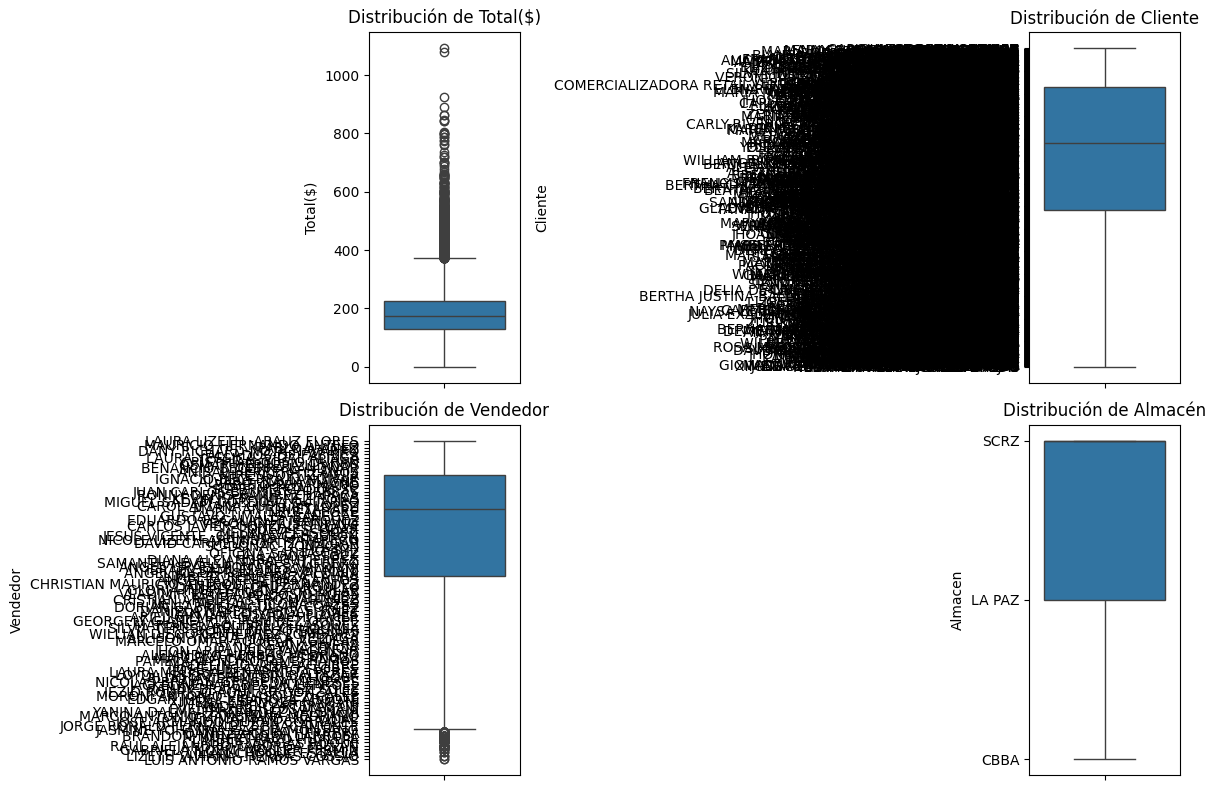

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear subgráficos para cada variable
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 filas, 2 columnas

# Diagrama de caja para Total($)
sns.boxplot(y=df['Total($)'], ax=axes[0, 0])
axes[0, 0].set_title("Distribución de Total($)")

# Diagrama de caja para Cliente
sns.boxplot(y=df['Cliente'], ax=axes[0, 1])
axes[0, 1].set_title("Distribución de Cliente")

# Diagrama de caja para Vendedor
sns.boxplot(y=df['Vendedor'], ax=axes[1, 0])
axes[1, 0].set_title("Distribución de Vendedor")

# Diagrama de caja para Almacén
sns.boxplot(y=df['Almacen'], ax=axes[1, 1])
axes[1, 1].set_title("Distribución de Almacén")

# Ajustar diseño
plt.tight_layout()
plt.show()


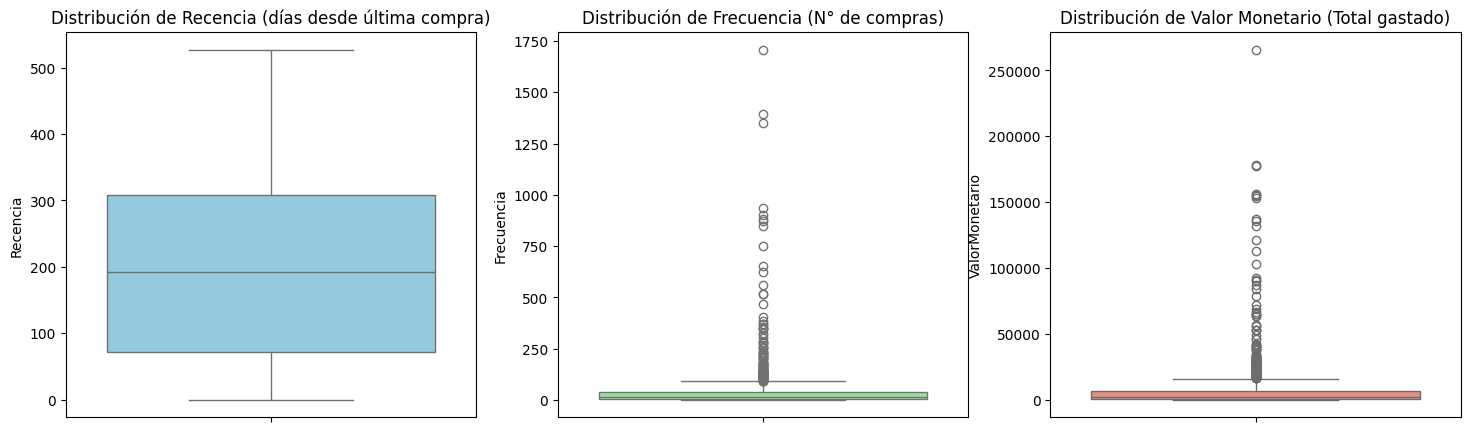

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Convertir la columna 'Fecha' a tipo datetime
df["Fecha"] = pd.to_datetime(df["Fecha"])

# 2. Definir la fecha de referencia (por ejemplo, la última fecha de la base de datos)
fecha_referencia = df["Fecha"].max()

# 3. Cálculo de Recencia (R) por cliente
recencia = df.groupby("Cliente")["Fecha"].max().reset_index()
recencia["Recencia"] = (fecha_referencia - recencia["Fecha"]).dt.days

# 4. Cálculo de Frecuencia (F) por cliente
frecuencia = df.groupby("Cliente").size().reset_index(name="Frecuencia")

# 5. Cálculo de Valor Monetario (M) por cliente (usando Pago($) o Total($))
valor_monetario = df.groupby("Cliente")["Total($)"].sum().reset_index()
valor_monetario.rename(columns={"Total($)": "ValorMonetario"}, inplace=True)

# 6. Unir todas las métricas en un solo DataFrame
rfm = recencia.merge(frecuencia, on="Cliente").merge(valor_monetario, on="Cliente")

# 7. Visualización con diagramas de caja
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot de Recencia
sns.boxplot(y=rfm["Recencia"], ax=axes[0], color="skyblue")
axes[0].set_title("Distribución de Recencia (días desde última compra)")

# Boxplot de Frecuencia
sns.boxplot(y=rfm["Frecuencia"], ax=axes[1], color="lightgreen")
axes[1].set_title("Distribución de Frecuencia (N° de compras)")

# Boxplot de Valor Monetario
sns.boxplot(y=rfm["ValorMonetario"], ax=axes[2], color="salmon")
axes[2].set_title("Distribución de Valor Monetario (Total gastado)")

plt.show()


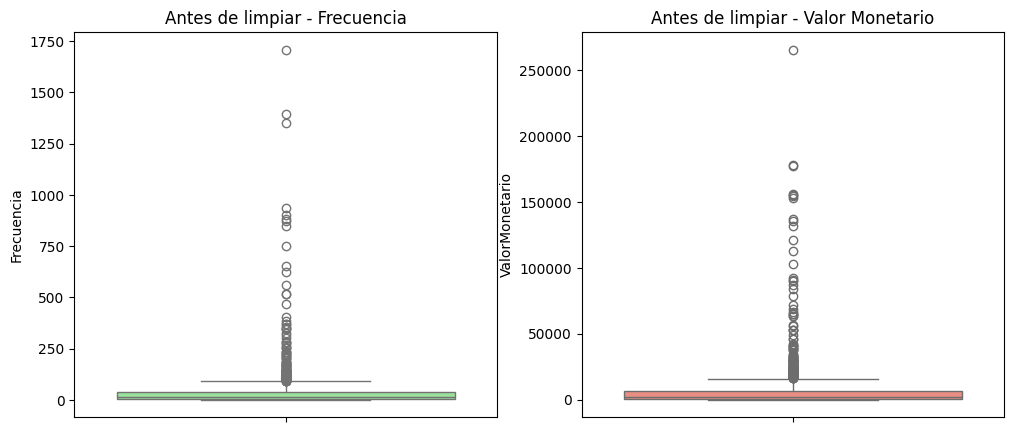

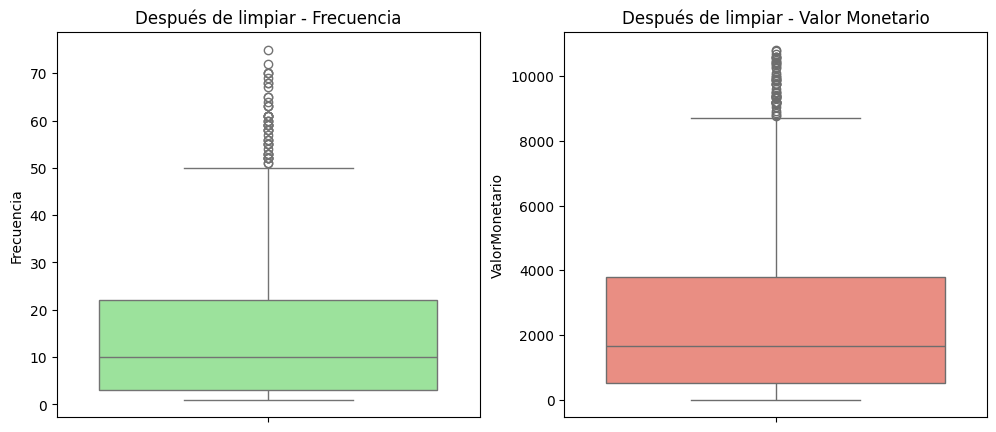

Número de clientes antes de limpiar: 1289
Número de clientes después de limpiar: 1085


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Generar datos de ejemplo (O usa tu DataFrame RFM)
# df = pd.read_csv("tus_datos.csv")  # Cargar si tienes el archivo

# Suponemos que ya tienes el DataFrame RFM con 'Frecuencia' y 'ValorMonetario'
# 2. Función para eliminar outliers usando IQR
def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]

# 3. Gráficos antes de eliminar outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=rfm["Frecuencia"], ax=axes[0], color="lightgreen")
axes[0].set_title("Antes de limpiar - Frecuencia")
sns.boxplot(y=rfm["ValorMonetario"], ax=axes[1], color="salmon")
axes[1].set_title("Antes de limpiar - Valor Monetario")
plt.show()

# 4. Aplicar la función a las columnas de interés
rfm_limpio = eliminar_outliers(rfm, "Frecuencia")
rfm_limpio = eliminar_outliers(rfm_limpio, "ValorMonetario")

# 5. Gráficos después de eliminar outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=rfm_limpio["Frecuencia"], ax=axes[0], color="lightgreen")
axes[0].set_title("Después de limpiar - Frecuencia")
sns.boxplot(y=rfm_limpio["ValorMonetario"], ax=axes[1], color="salmon")
axes[1].set_title("Después de limpiar - Valor Monetario")
plt.show()

# 6. Mostrar comparación del número de clientes antes y después
print(f"Número de clientes antes de limpiar: {len(rfm)}")
print(f"Número de clientes después de limpiar: {len(rfm_limpio)}")


#METODO CHI CUADRADO

In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [ ]:
# Paso 1: Transformar variables numéricas en categóricas
# Agrupamos 'total' en categorías por rangos (bajo, medio, alto)
df['total_categoria'] = pd.cut(df['Total($)'], bins=3, labels=['Bajo', 'Medio', 'Alto'])

In [ ]:
# Paso 2: Aplicar prueba de chi-cuadrado entre pares de variables categóricas
def chi_square_test(var1, var2):
    # Creamos una tabla de contingencia
    contingency_table = pd.crosstab(df[var1], df[var2])
    # Aplicamos el test de chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

In [ ]:
# Variables a analizar
categorical_vars = ['Almacen', 'Marca', 'Cliente', 'Vendedor', 'total_categoria','Item']

In [ ]:
# Realizamos el test de chi-cuadrado para cada par de variables
results = []
for i in range(len(categorical_vars)):
    for j in range(i + 1, len(categorical_vars)):
        var1 = categorical_vars[i]
        var2 = categorical_vars[j]
        chi2, p = chi_square_test(var1, var2)
        results.append({'Variable 1': var1, 'Variable 2': var2, 'Chi2': chi2, 'P-valor': p})

In [ ]:
# Convertimos los resultados en un DataFrame para visualizar
chi2_results = pd.DataFrame(results)
print("Resultados del Test de Chi-Cuadrado:")
print(chi2_results)

Resultados del Test de Chi-Cuadrado:
         Variable 1       Variable 2          Chi2       P-valor
0           Almacen            Marca  7.052854e+03  0.000000e+00
1           Almacen          Cliente  1.073820e+05  0.000000e+00
2           Almacen         Vendedor  1.073820e+05  0.000000e+00
3           Almacen  total_categoria  1.357988e+02  2.238116e-28
4           Almacen             Item  8.305442e+04  0.000000e+00
5             Marca          Cliente  1.239721e+05  0.000000e+00
6             Marca         Vendedor  2.519758e+04  0.000000e+00
7             Marca  total_categoria  4.847474e+02  5.689481e-80
8             Marca             Item  2.027799e+05  0.000000e+00
9           Cliente         Vendedor  3.085569e+06  0.000000e+00
10          Cliente  total_categoria  6.572222e+03  0.000000e+00
11          Cliente             Item  8.935084e+06  0.000000e+00
12         Vendedor  total_categoria  6.508129e+02  2.603703e-52
13         Vendedor             Item  9.311191e+05  0

In [ ]:
# Filtramos relaciones significativas (P-valor < 0.05)
significant_results = chi2_results[chi2_results['P-valor'] < 0.05]
print("\nRelaciones Significativas:")
print(significant_results)


Relaciones Significativas:
         Variable 1       Variable 2          Chi2       P-valor
0           Almacen            Marca  7.052854e+03  0.000000e+00
1           Almacen          Cliente  1.073820e+05  0.000000e+00
2           Almacen         Vendedor  1.073820e+05  0.000000e+00
3           Almacen  total_categoria  1.357988e+02  2.238116e-28
4           Almacen             Item  8.305442e+04  0.000000e+00
5             Marca          Cliente  1.239721e+05  0.000000e+00
6             Marca         Vendedor  2.519758e+04  0.000000e+00
7             Marca  total_categoria  4.847474e+02  5.689481e-80
8             Marca             Item  2.027799e+05  0.000000e+00
9           Cliente         Vendedor  3.085569e+06  0.000000e+00
10          Cliente  total_categoria  6.572222e+03  0.000000e+00
11          Cliente             Item  8.935084e+06  0.000000e+00
12         Vendedor  total_categoria  6.508129e+02  2.603703e-52
13         Vendedor             Item  9.311191e+05  0.000000e+

#agrupar cliente por su total

In [ ]:
# Agrupar por cliente y calcular las métricas
client_data = df.groupby('Cliente').agg(
    total_gastado=('Total($)', 'sum'),
    frecuencia_compras=('Total($)', 'count'),
    promedio_gastado=('Total($)', 'mean')
).reset_index()

In [ ]:
client_data

,Cliente,total_gastado,frecuencia_compras,promedio_gastado
0,ABIGAIL-BENITEZ CHUQUIMIA,4630.44,29,159.670345
1,ABIGAIL-QUINA TERRAZAS,957.12,5,191.424000
2,ADAN FRANZ-CUELLAR ACHA,1624.60,7,232.085714
3,ADELA -ENCINAS,5592.00,34,164.470588
4,ADELA-CHAMBI,5376.48,28,192.017143
...,...,...,...,...
1284,ZULMA-ALMENDRAS MONTAñO,291.96,2,145.980000
1285,ZULMA-PEREDO ROCHA,1688.28,8,211.035000
1286,ZULMA-YEPEZ BARRETO,12376.84,90,137.520444
1287,ZUNILDA DELFINA-RAMIREZ ZUNA,2264.99,21,107.856667


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar las características seleccionadas
scaler = StandardScaler()
client_data[['total_gastado', 'frecuencia_compras', 'promedio_gastado']] = scaler.fit_transform(
    client_data[['total_gastado', 'frecuencia_compras', 'promedio_gastado']]
)

In [ ]:
from sklearn.cluster import KMeans

# Definir el número de clusters (puedes experimentar con este valor)
n_clusters = 6  # Por ejemplo, 2 grupos: mejores y peores clientes

# Aplicar K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
client_data['cluster'] = kmeans.fit_predict(client_data[['total_gastado', 'frecuencia_compras', 'promedio_gastado']])

In [ ]:
# Ver la distribución de clientes en cada grupo
print(client_data.groupby('cluster').agg({
    'Cliente': 'count',
    'total_gastado': 'mean',
    'frecuencia_compras': 'mean',
    'promedio_gastado': 'mean'
}))

         Cliente  total_gastado  frecuencia_compras  promedio_gastado
cluster                                                              
0            769      -0.160229           -0.145147         -0.022639
1            221      -0.336388           -0.275221         -1.384339
2             86       1.586907            1.344994          0.322569
3              2       6.294275           13.765935         -1.659597
4            199      -0.228665           -0.260974          1.481038
5             12       7.833297            6.764541          0.350027


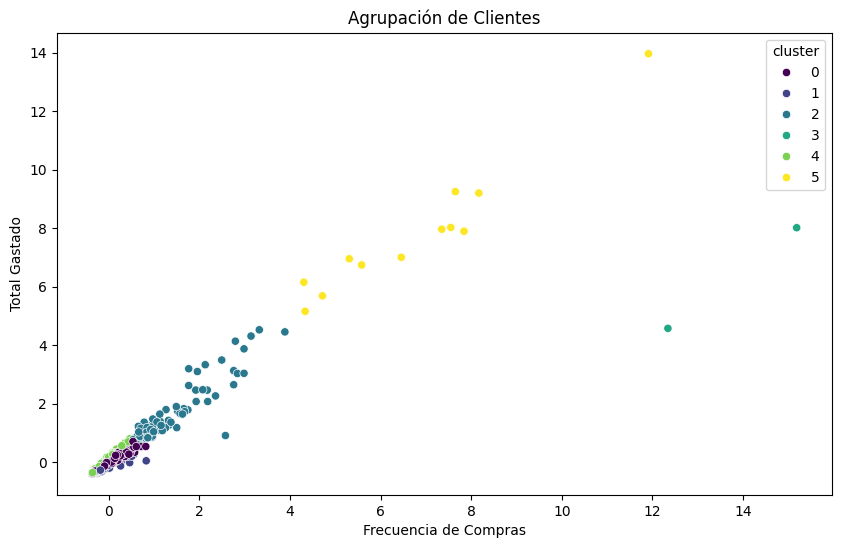

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=client_data, x='frecuencia_compras', y='total_gastado', hue='cluster', palette='viridis')
plt.title('Agrupación de Clientes')
plt.xlabel('Frecuencia de Compras')
plt.ylabel('Total Gastado')
plt.show()

In [ ]:
# Resumen estadístico de las variables numéricas
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Pares,53691.0,10.770017,12.00,3.370238,1.00,9.00,12.00,12.00,47.00
Total($),53691.0,178.456844,173.04,84.430261,0.08,129.96,173.04,227.04,1091.88
Desc($),53691.0,781.370744,212.50,1319.181122,-881.75,18.97,212.50,907.77,12381.00


# ANALISIS RFM

In [ ]:
# Análisis de series temporales
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.tools import FigureFactory as ff
from plotly.offline import iplot

Ventas_por_semana = df.resample('w', on='Fecha').size()
fig = px.line(df, x=Ventas_por_semana.index, y=Ventas_por_semana,
              labels={'y': 'Número de Ventas', 'x': 'Fecha'})
fig.update_layout(title_text='Número de Ventas Semanal', title_x=0.5, title_font=dict(size=18))
fig.show()

cliente_unico_por_semana = df.resample('w', on='Fecha').Cliente.nunique()
fig = px.line(cliente_unico_por_semana, x=cliente_unico_por_semana.index, y=cliente_unico_por_semana,
              labels={'y': 'Número de Clientes'})
fig.update_layout(title_text='Número de Clientes Semanal', title_x=0.5, title_font=dict(size=18))
fig.show()

<ipython-input-56-e998f51fae72>:11: FutureWarning:

'w' is deprecated and will be removed in a future version, please use 'W' instead.



<ipython-input-56-e998f51fae72>:17: FutureWarning:

'w' is deprecated and will be removed in a future version, please use 'W' instead.



In [ ]:
# Análisis de RFM
fecha_referencia = df['Fecha'].max() + pd.DateOffset(days=1)
rfm_data = df.groupby('Cliente').agg({
    'Fecha': lambda x: (fecha_referencia - x.max()).days,
    'Cliente': 'count',
    'Total($)': 'sum'
})
rfm_data.columns = ['Recencia', 'Frecuencia', 'ValorMonetario']

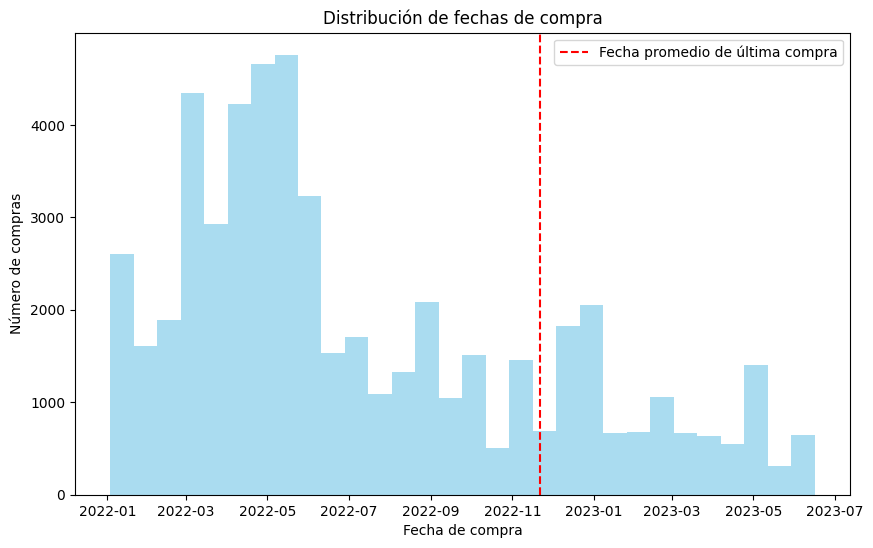

In [ ]:
#Grafico del promedio de fechas de ultima compra de los clientes
# Calcular la fecha promedio en la que los clientes dejaron de comprar
promedio_fecha_ultima_venta = df['Fecha'].max() - pd.to_timedelta(rfm_data['Recencia'].mean(), unit='D')

plt.figure(figsize=(10, 6))
plt.axvline(x=promedio_fecha_ultima_venta, color='red', linestyle='--', label='Fecha promedio de última compra')
plt.hist(df['Fecha'], bins=30, color='skyblue', alpha=0.7)
plt.title('Distribución de fechas de compra')
plt.xlabel('Fecha de compra')
plt.ylabel('Número de compras')
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# Histograma de la Recencia
fig = px.histogram(rfm_data, x='Recencia', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Distribución de Frecuencia de Visitas de los Clientes',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [ ]:
# Histograma del Valor Monetario
fig = px.histogram(rfm_data, x='ValorMonetario', opacity=0.85, marginal='box')
fig.update_traces(marker=dict(line=dict(color='skyblue', width=1)))
fig.update_layout(title_text='Distribución Monetaria de los Clientes',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [ ]:
# Asignar puntuaciones RFM
def rfm_scores_improved(dataframe):
    """
    Asigna puntuaciones RFM a los clientes incluyendo la Frecuencia en el análisis:
    - Recencia_score: 5 - más reciente, 1 - menos reciente
    - Frecuencia_score: 1 - menos frecuente, 5 - más frecuente
    - ValorMonetario_score: 1 - menos valioso, 5 - más valioso
    - RFM_SCORE: Suma de Recencia_score, Frecuencia_score y ValorMonetario_score
    """
    dataframe["Recencia_score"] = pd.qcut(dataframe["Recencia"], 5, labels=[5, 4, 3, 2, 1])
    dataframe["Frecuencia_score"] = pd.qcut(dataframe["Frecuencia"].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
    dataframe["ValorMonetario_score"] = pd.qcut(dataframe["ValorMonetario"], 5, labels=[1, 2, 3, 4, 5])

    # Sumamos las puntuaciones para obtener un RFM_SCORE mejorado
    dataframe["RFM_SCORE"] = dataframe["Recencia_score"].astype(str) + dataframe["Frecuencia_score"].astype(str) + dataframe["ValorMonetario_score"].astype(str)

    return dataframe


rfm_scores_improved(rfm_data)

,Recencia,Frecuencia,ValorMonetario,Recencia_score,Frecuencia_score,ValorMonetario_score,RFM_SCORE
Cliente,,,,,,,
ABIGAIL-BENITEZ CHUQUIMIA,192,29,4630.44,3,4,4,344
ABIGAIL-QUINA TERRAZAS,38,5,957.12,5,2,2,522
ADAN FRANZ-CUELLAR ACHA,94,7,1624.60,4,2,3,423
ADELA -ENCINAS,38,34,5592.00,5,4,4,544
ADELA-CHAMBI,184,28,5376.48,3,4,4,344
...,...,...,...,...,...,...,...
ZULMA-ALMENDRAS MONTAñO,154,2,291.96,4,1,1,411
ZULMA-PEREDO ROCHA,228,8,1688.28,3,2,3,323
ZULMA-YEPEZ BARRETO,197,90,12376.84,3,5,5,355


In [ ]:
# Mapeo de segmentos RFM
mapa_segmentos = {
    r'[4-5][4-5][4-5]': 'Campeones',            # Muy recientes, muy frecuentes, muy altos gastos
    r'[2-3][4-5][4-5]': 'Leales',               # Menos recientes, pero frecuentes y altos gastos
    r'[4-5][2-5][4-5]': 'Potencial Alto',       # Muy recientes, cualquier frecuencia, altos gastos
    r'[4-5][2-5][1-3]': 'Nuevos Gastadores',    # Muy recientes, cualquier frecuencia, gastos moderados
    r'[2-3][2-3][4-5]': 'Gastadores Ocasionales', # Menos recientes, frecuencia y gastos moderados
    r'[2-4][1-5][1-4]': 'Clientes con Potencial', # Cualquier recencia, cualquier frecuencia, gastos moderados
    r'[2-3][4-5][2-3]': 'Leales Económicos',    # Menos recientes, frecuentes, gastos moderados
    r'[1][4-5][4-5]': 'En Riesgo',              # No recientes, pero frecuentes y altos gastos
    r'[1-2][1-3][4-5]': 'Casi Perdidos',        # No recientes, baja frecuencia, pero altos gastos
    r'[1-2][4-5][1-3]': 'Necesitan Atención',   # No recientes, frecuentes, gastos bajos o moderados
    r'[3-4][1-3][1-3]': 'Promedio',             # Recientes y frecuencia moderada, gastos bajos
    r'[1-3][1-3][1-3]': 'Sin Actividad',        # No recientes, no frecuentes, bajos gastos
    r'[1-3][1-3][1-2]': 'Dormidos',             # poca participacion.
    r'[4-5][1][1-5]': 'Clientes Nuevos',        # Muy recientes, no frecuentes, cualquier gasto
    r'[1][1][1]': 'Perdidos',                   # No recientes, no frecuentes, gastos muy bajos
}


rfm_data['segmento'] = rfm_data['RFM_SCORE'].replace(mapa_segmentos, regex = True)

rfm_data

,Recencia,Frecuencia,ValorMonetario,Recencia_score,Frecuencia_score,ValorMonetario_score,RFM_SCORE,segmento
Cliente,,,,,,,,
ABIGAIL-BENITEZ CHUQUIMIA,192,29,4630.44,3,4,4,344,Leales
ABIGAIL-QUINA TERRAZAS,38,5,957.12,5,2,2,522,Nuevos Gastadores
ADAN FRANZ-CUELLAR ACHA,94,7,1624.60,4,2,3,423,Nuevos Gastadores
ADELA -ENCINAS,38,34,5592.00,5,4,4,544,Campeones
ADELA-CHAMBI,184,28,5376.48,3,4,4,344,Leales
...,...,...,...,...,...,...,...,...
ZULMA-ALMENDRAS MONTAñO,154,2,291.96,4,1,1,411,Clientes con Potencial
ZULMA-PEREDO ROCHA,228,8,1688.28,3,2,3,323,Clientes con Potencial
ZULMA-YEPEZ BARRETO,197,90,12376.84,3,5,5,355,Leales


<Figure size 2000x1500 with 0 Axes>

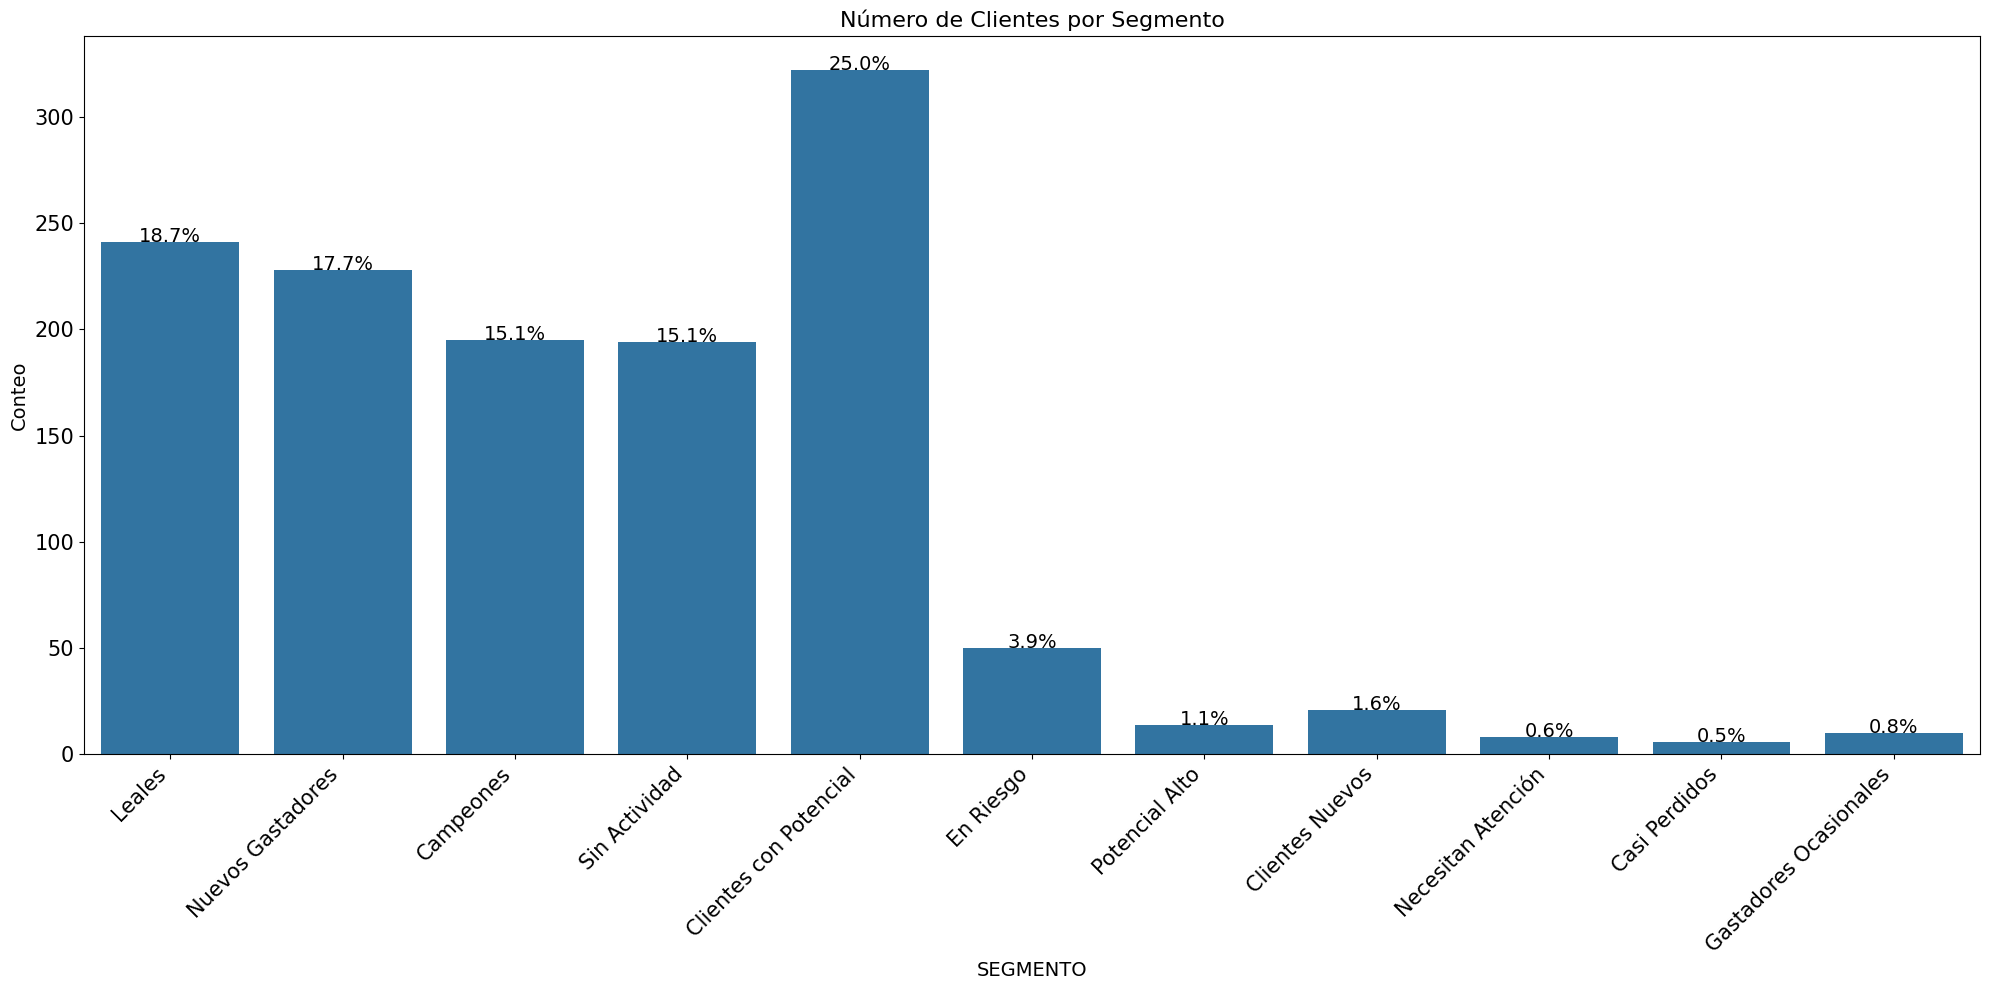

In [ ]:
# Gráfico de barras de segmentos RFM
plt.figure(figsize=(20, 15))
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data=rfm_data, x='segmento', ax=ax)
total = len(rfm_data.segmento)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_y() + patch.get_height()
    ax.annotate(percentage, (x, y), ha='center', size=14)  # Centrar la anotación

plt.title('Número de Clientes por Segmento', size=16)
plt.ylabel('Conteo', size=14)
plt.xlabel('SEGMENTO', fontsize=14)
plt.xticks(rotation=45, ha='right', size=15)  # Rotar las etiquetas del eje x
plt.yticks(size=15)
plt.tight_layout()  # Ajustar automáticamente los parámetros de la subtrama para que la subtrama se ajuste al área de la figura
plt.show()


In [ ]:
# Tabla de clientes en el segmento "Clientes con Potencial"
segmento = "Clientes con Potencial"
a = rfm_data[rfm_data["segmento"] == segmento].sort_values(by="ValorMonetario", ascending=False).head()
colorscale = "inferno"
table = ff.create_table(a, colorscale=colorscale)
for i in range(len(table.layout.annotations)):
    table.layout.annotations[i].font.size = 12
iplot(table)


/usr/local/lib/python3.11/dist-packages/plotly/tools.py:584: UserWarning:

plotly.tools.FigureFactory.create_table is deprecated. Use plotly.figure_factory.create_table



In [ ]:
# Treemap de segmentos RFM
x = rfm_data.segmento.value_counts()
fig = px.treemap(x, path=[x.index], values=x)
fig.update_layout(title_text='Distribución de los Segmentos RFM', title_x=0.5, title_font=dict(size=20))
fig.update_traces(textinfo="label+value+percent root")
fig.show()

In [ ]:
# Estadísticas por segmento RFM
rfm_data[["segmento", "Recencia", "Frecuencia", "ValorMonetario"]].groupby("segmento").agg(["mean", "count"])

Recencia        Frecuencia       ValorMonetario  \
                              mean count        mean count           mean   
segmento                                                                    
Campeones                51.323077   195  120.282051   195   20570.179179   
Casi Perdidos           419.500000     6   15.833333     6    3687.041667   
Clientes Nuevos          28.000000    21    1.666667    21     327.504762   
Clientes con Potencial  219.919255   322    6.279503   322    1023.327888   
En Riesgo               400.160000    50   67.600000    50   12207.278800   
Gastadores Ocasionales  244.500000    10   17.700000    10    3876.286000   
Leales                  233.929461   241   86.302905   241   16288.084066   
Necesitan Atención      421.000000     8   24.875000     8    2781.890000   
Nuevos Gastadores        70.526316   228    9.868421   228    1743.499123   
Potencial Alto           48.714286    14   16.571429    14    3963.269286   
Sin Actividad           426.582474   194    5.396907   194     835.135619   

                              
                       count  
segmento                      
Campeones                195  
Casi Perdidos              6  
Clientes Nuevos           21  
Clientes con Potencial   322  
En Riesgo                 50  
Gastadores Ocasionales    10  
Leales                   241  
Necesitan Atención         8  
Nuevos Gastadores        228  
Potencial Alto            14  
Sin Actividad            194

Text(0, 0.5, 'WCSS')

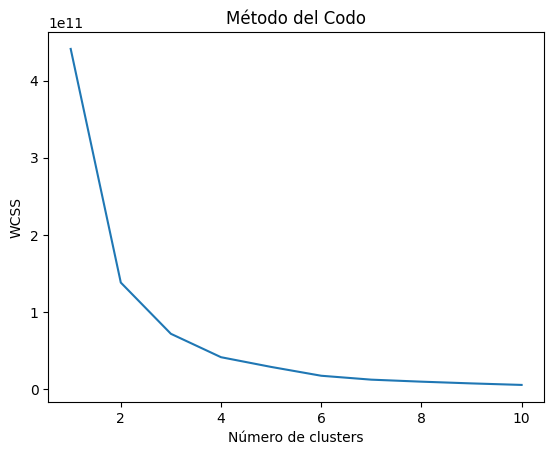

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# rfm_data[["Recency", "Frequency", "MonetaryValue"]]  #Tus datos RFM

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_data[["Recencia", "Frecuencia", "ValorMonetario"]])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

                           Recencia  Frecuencia  ValorMonetario  \
Cliente                                                           
ABIGAIL-BENITEZ CHUQUIMIA       192          29         4630.44   
ABIGAIL-QUINA TERRAZAS           38           5          957.12   
ADAN FRANZ-CUELLAR ACHA          94           7         1624.60   
ADELA -ENCINAS                   38          34         5592.00   
ADELA-CHAMBI                    184          28         5376.48   

                          Recencia_score Frecuencia_score  \
Cliente                                                     
ABIGAIL-BENITEZ CHUQUIMIA              3                4   
ABIGAIL-QUINA TERRAZAS                 5                2   
ADAN FRANZ-CUELLAR ACHA                4                2   
ADELA -ENCINAS                         5                4   
ADELA-CHAMBI                           3                4   

                          ValorMonetario_score RFM_SCORE           segmento  \
Cliente                

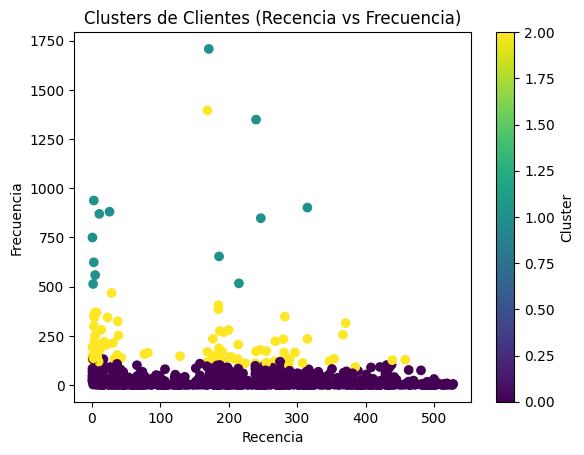

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determina el número óptimo de clusters 'k' basado en el método del codo (aquí un ejemplo, reemplaza 3 con tu valor)
k = 3  # Reemplaza con el número óptimo de clusters que encontraste

# Aplica K-means clustering con el número óptimo de clusters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(rfm_data[["Recencia", "Frecuencia", "ValorMonetario"]])

# Asigna los clusters a los datos originales
rfm_data['Cluster'] = kmeans.labels_

# Imprime algunos ejemplos para verificar los resultados
print(rfm_data.head())

# Opcional: Visualiza los clusters (ejemplo con Recencia vs Frecuencia)
plt.scatter(rfm_data['Recencia'], rfm_data['Frecuencia'], c=rfm_data['Cluster'], cmap='viridis')
plt.xlabel('Recencia')
plt.ylabel('Frecuencia')
plt.title('Clusters de Clientes (Recencia vs Frecuencia)')
plt.colorbar(label='Cluster')
plt.show()


Para n_clusters = 2, el silhouette_score promedio es: 0.9230
Para n_clusters = 3, el silhouette_score promedio es: 0.8266
Para n_clusters = 4, el silhouette_score promedio es: 0.7678
Para n_clusters = 5, el silhouette_score promedio es: 0.7588
Para n_clusters = 6, el silhouette_score promedio es: 0.7074
Para n_clusters = 7, el silhouette_score promedio es: 0.7051
Para n_clusters = 8, el silhouette_score promedio es: 0.6377
Para n_clusters = 9, el silhouette_score promedio es: 0.6230
Para n_clusters = 10, el silhouette_score promedio es: 0.6129


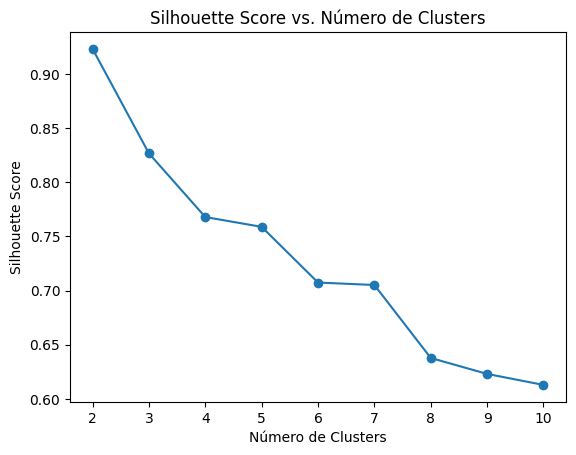

El número óptimo de clusters basado en el Silhouette Score es: 2


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Suponiendo que ya tienes rfm_data[["Recencia", "Frecuencia", "ValorMonetario"]]
range_n_clusters = range(2, 11)  # Probar diferentes números de clusters
silhouette_scores = []
for n_clusters in range_n_clusters:
    # Inicializar el clusterer con el número de clusters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(rfm_data[["Recencia", "Frecuencia", "ValorMonetario"]])

    # El silhouette_score da el promedio de todos los ejemplos.
    # Proporciona una perspectiva de la densidad y separación de los clusters formados
    silhouette_avg = silhouette_score(rfm_data[["Recencia", "Frecuencia", "ValorMonetario"]], cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Para n_clusters = {n_clusters}, el silhouette_score promedio es: {silhouette_avg:.4f}")
# Graficar los silhouette scores para encontrar el número óptimo de clusters
import matplotlib.pyplot as plt
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()
# Opcional: Imprimir el número óptimo de clusters basado en el silhouette score
optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f'El número óptimo de clusters basado en el Silhouette Score es: {optimal_clusters}')


Precisión del modelo: 0.9496124031007752

Reporte de clasificación:
                         precision    recall  f1-score   support

             Campeones       1.00      0.98      0.99        41
         Casi Perdidos       1.00      1.00      1.00         1
       Clientes Nuevos       0.00      0.00      0.00         9
Clientes con Potencial       0.88      0.95      0.91        59
             En Riesgo       1.00      1.00      1.00        12
Gastadores Ocasionales       1.00      1.00      1.00         3
                Leales       1.00      1.00      1.00        41
    Necesitan Atención       1.00      1.00      1.00         1
     Nuevos Gastadores       0.93      1.00      0.96        51
        Potencial Alto       0.75      1.00      0.86         3
         Sin Actividad       1.00      1.00      1.00        37

              accuracy                           0.95       258
             macro avg       0.87      0.90      0.88       258
          weighted avg       0.92

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



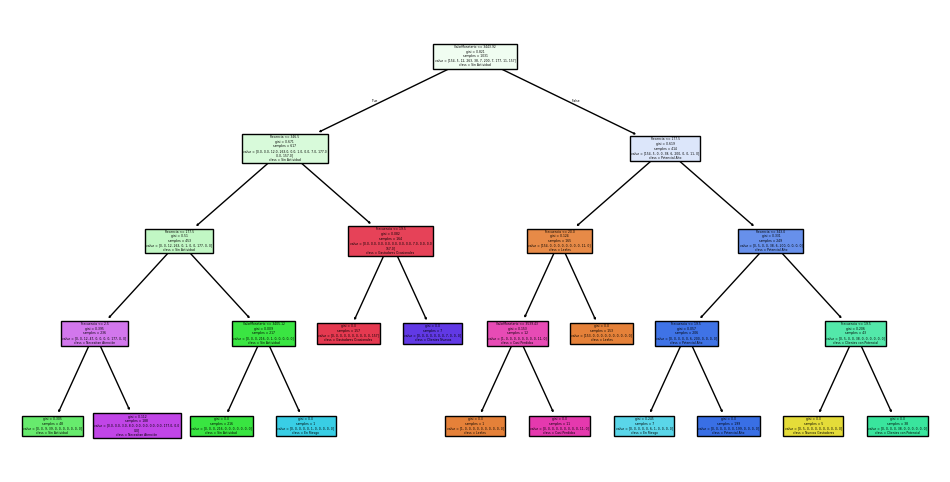

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# 📌 1. Cargar Datos (Asegúrate de que rfm_data ya tiene los segmentos)
# Variables predictoras (features)
X = rfm_data[["Recencia", "Frecuencia", "ValorMonetario"]]

# Variable objetivo (target) - Asegúrate de que existe una columna con los segmentos
y = rfm_data["segmento"]

# 📌 2. Dividir en entrenamiento y prueba (80% train - 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 3. Crear y entrenar el árbol de decisión
arbol = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
arbol.fit(X_train, y_train)

# 📌 4. Hacer predicciones
y_pred = arbol.predict(X_test)

# 📌 5. Evaluar el modelo
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# 📌 6. Visualizar el árbol de decisión
plt.figure(figsize=(12, 6))
plot_tree(arbol, feature_names=X.columns, class_names=[str(c) for c in y.unique()], filled=True)
plt.show()


####cluster de rfm

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Asumiendo que ya tienes las puntuaciones RFM
# Puedes hacer un clustering usando KMeans (por ejemplo, 3 clusters)
X = rfm_data[['Recencia', 'Frecuencia', 'ValorMonetario']]  # Usamos las variables RFM

# Realizamos el clustering KMeans (ajusta el número de clusters según sea necesario)
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(X)

# Calculamos el índice de Silhouette
silhouette_avg = silhouette_score(X, rfm_data['Cluster'])
print(f"Índice de Silhouette: {silhouette_avg:.4f}")
# Contar la cantidad de clientes en cada cluster
cluster_counts = rfm_data['Cluster'].value_counts()


Índice de Silhouette: 0.8132


#porcentage de cada cluster

In [ ]:
# Calcular el porcentaje de cada cluster
cluster_percentages = rfm_data['Cluster'].value_counts(normalize=True) * 100

# Crear un DataFrame con los resultados
cluster_summary = pd.DataFrame({'Cantidad de clientes': cluster_counts,
                                'Porcentaje': cluster_percentages})

# Mostrar los resultados
print(cluster_summary)

         Cantidad de clientes  Porcentaje
Cluster                                  
0                        1179   91.466253
2                          92    7.137316
1                          18    1.396431


In [ ]:
import pandas as pd

# Crear una tabla cruzada para ver la distribución de segmentos en cada cluster
segment_cluster_distribution = pd.crosstab(rfm_data['segmento'], rfm_data['Cluster'])

# Calcular el porcentaje de cada segmento dentro de cada cluster
segment_cluster_percentage = segment_cluster_distribution.div(segment_cluster_distribution.sum(axis=0), axis=1) * 100

# Mostrar los resultados
print("Distribución de segmentos en cada cluster (conteo):")
print(segment_cluster_distribution)

print("\nDistribución de segmentos en cada cluster (porcentaje):")
print(segment_cluster_percentage)


Distribución de segmentos en cada cluster (conteo):
Cluster                   0   1   2
segmento                           
Campeones               143  10  42
Casi Perdidos             6   0   0
Clientes Nuevos          21   0   0
Clientes con Potencial  322   0   0
En Riesgo                43   0   7
Gastadores Ocasionales   10   0   0
Leales                  190   8  43
Necesitan Atención        8   0   0
Nuevos Gastadores       228   0   0
Potencial Alto           14   0   0
Sin Actividad           194   0   0

Distribución de segmentos en cada cluster (porcentaje):
Cluster                         0          1          2
segmento                                               
Campeones               12.128923  55.555556  45.652174
Casi Perdidos            0.508906   0.000000   0.000000
Clientes Nuevos          1.781170   0.000000   0.000000
Clientes con Potencial  27.311281   0.000000   0.000000
En Riesgo                3.647159   0.000000   7.608696
Gastadores Ocasionales   0.8481

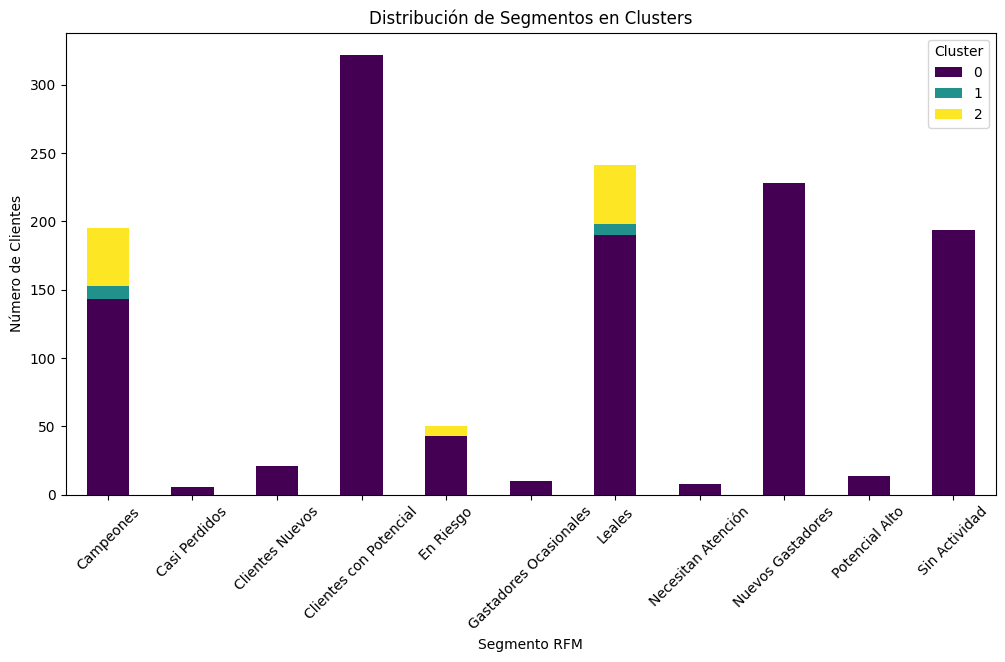

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de barras apiladas
segment_cluster_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.xlabel("Segmento RFM")
plt.ylabel("Número de Clientes")
plt.title("Distribución de Segmentos en Clusters")
plt.legend(title="Cluster")
plt.xticks(rotation=45)
plt.show()


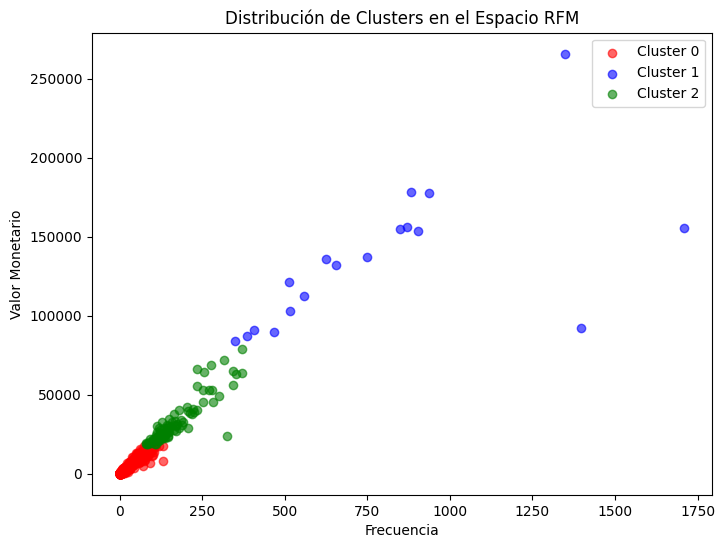

In [ ]:
import matplotlib.pyplot as plt

# Definir colores para los clusters
colors = ['red', 'blue', 'green']  # Ajustar si hay más clusters

# Graficar los puntos con colores según su cluster
plt.figure(figsize=(8, 6))
for cluster in range(3):  # Si tienes más de 3 clusters, ajusta este rango
    subset = rfm_data[rfm_data['Cluster'] == cluster]
    plt.scatter(subset['Frecuencia'], subset['ValorMonetario'],
                label=f'Cluster {cluster}', alpha=0.6, c=colors[cluster])

# Etiquetas y título
plt.xlabel("Frecuencia")
plt.ylabel("Valor Monetario")
plt.title("Distribución de Clusters en el Espacio RFM")
plt.legend()
plt.show()

Accuracy: 0.9483204134366925

Reporte de Clasificación:
                         precision    recall  f1-score   support

             Campeones       1.00      0.98      0.99        59
         Casi Perdidos       1.00      1.00      1.00         1
       Clientes Nuevos       0.00      0.00      0.00         9
Clientes con Potencial       0.91      0.93      0.92        98
             En Riesgo       1.00      1.00      1.00        16
Gastadores Ocasionales       1.00      1.00      1.00         3
                Leales       1.00      1.00      1.00        66
    Necesitan Atención       1.00      0.33      0.50         3
     Nuevos Gastadores       0.93      0.99      0.96        78
        Potencial Alto       0.75      1.00      0.86         3
         Sin Actividad       0.93      1.00      0.96        51

              accuracy                           0.95       387
             macro avg       0.86      0.84      0.84       387
          weighted avg       0.93      0.95  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



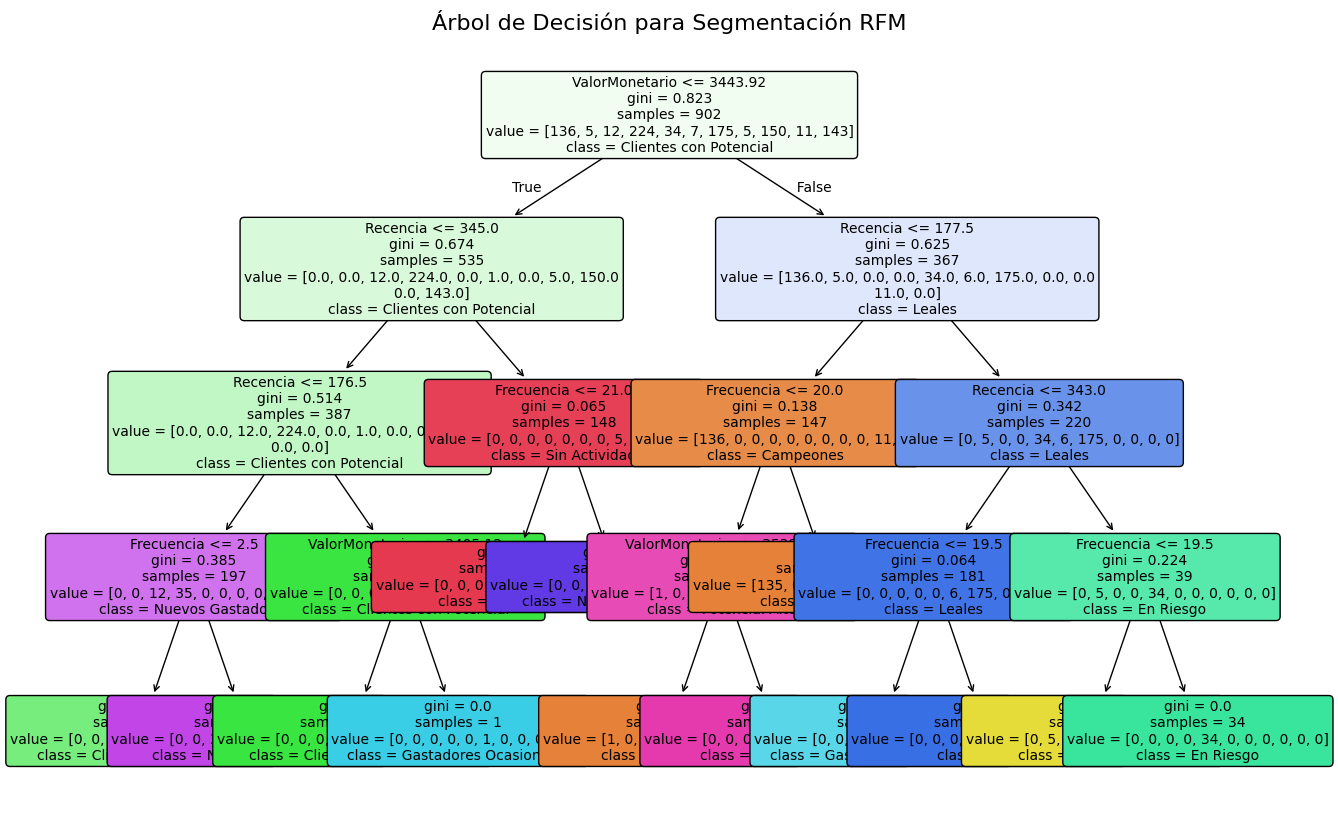

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np

# Preparar las características (X) y las etiquetas (y)
X = rfm_data[['Recencia', 'Frecuencia', 'ValorMonetario']]
y = rfm_data['segmento']

# Convertir las etiquetas a valores numéricos
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(max_depth=4, random_state=42)  # Limitar la profundidad del árbol para facilitar la interpretación
clf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Visualizar el árbol de decisión
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Árbol de Decisión para Segmentación RFM", fontsize=16)
plt.show()


# ANALISIS K-MEAN CLUSTERIN

In [ ]:
data = pd.get_dummies(df, columns=['Almacen', 'Vendedor', 'Cliente', 'Item','Marca'], drop_first=True)


In [ ]:
#data

In [ ]:
features = ['Total($)','Pares']

In [ ]:
features

['Total($)', 'Pares']

In [ ]:
X = df[features]
# dataX = pd.get_dummies(X,'Marca', drop_first=True)

In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Encontrar el número óptimo de clústeres usando el método del codo
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

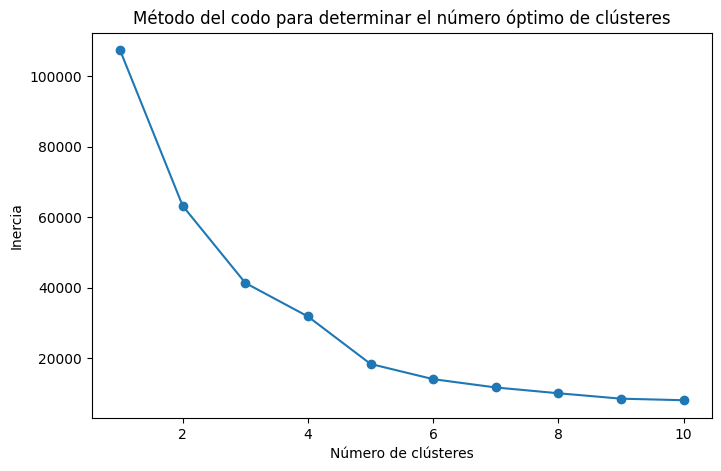

In [ ]:
# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar el número óptimo de clústeres')
plt.show()

In [ ]:
# Entrenar el modelo K-means con el número óptimo de clústeres (por ejemplo, 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

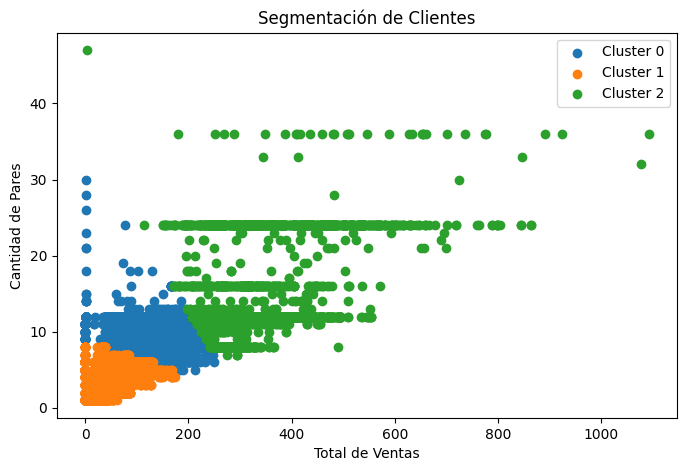

In [ ]:
# Visualización de los clústeres
plt.figure(figsize=(8, 5))
for cluster in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Total($)'], cluster_data['Pares'], label=f'Cluster {cluster}')

plt.xlabel('Total de Ventas')
plt.ylabel('Cantidad de Pares')
plt.title('Segmentación de Clientes')
plt.legend()
plt.show()

# SEGUNDA FORMA

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, f1_score
from sklearn.model_selection import train_test_split


In [ ]:
# Preprocesamiento
# Convertir columnas categóricas a numéricas utilizando LabelEncoder
label_encoders = {}
categorical_columns = ['Almacen', 'Vendedor', 'Cliente', 'Item', 'Marca']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Asegurar que las columnas categóricas sean numéricas y normalizar
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[categorical_columns])

In [ ]:
# Elegir el número óptimo de clusters usando el método del codo
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


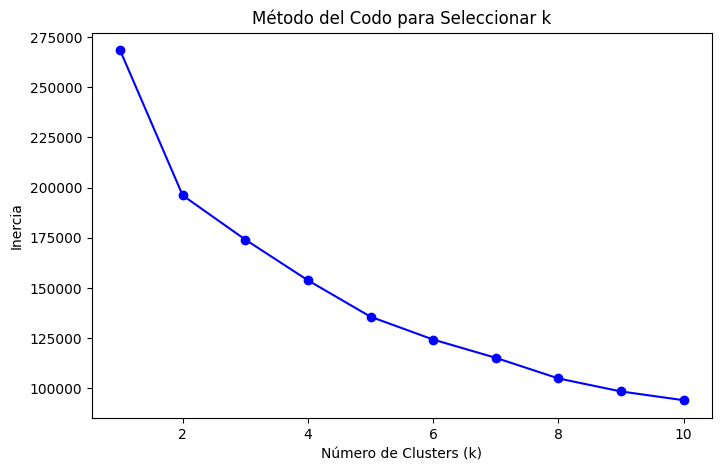

In [ ]:
# Graficar el método del codo
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Seleccionar k')
plt.show()

In [ ]:
# Elegir el número de clusters (basado en el gráfico)
optimal_k = 3  # Ajustar según el gráfico del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [ ]:
# Evaluar el modelo con Silhouette Score
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.19


In [ ]:
# Crear etiquetas reales para evaluar F1-score (si es aplicable)
# Ejemplo: Supongamos que tienes una columna 'Cluster_real'
if 'Cluster_real' in df.columns:
    y_true = df['Cluster_real']
    y_pred = df['Cluster']
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"F1-Score: {f1:.2f}")

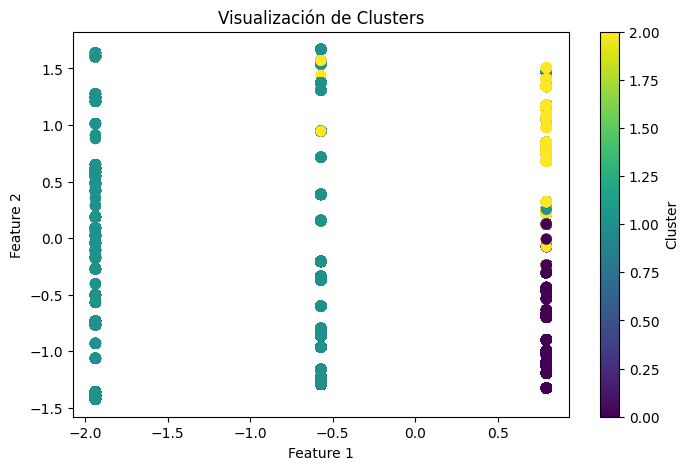

In [ ]:
# Visualización de los clusters
plt.figure(figsize=(8, 5))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Visualización de Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

# ULTIMA FORMA

In [ ]:
# Importar bibliotecas
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 3. Preprocesamiento
# Convertir columnas categóricas a numéricas usando LabelEncoder
categorical_cols = ['Almacen', 'Vendedor', 'Cliente', 'Item', 'Marca']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


In [ ]:
# Escalar los datos para normalizar
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[categorical_cols])

In [ ]:
# 4. Aplicar KMeans para segmentar
# Determinar el número óptimo de clusters usando el método del codo
inertia = []
range_clusters = range(1, 11)  # Probar entre 1 y 10 clusters

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

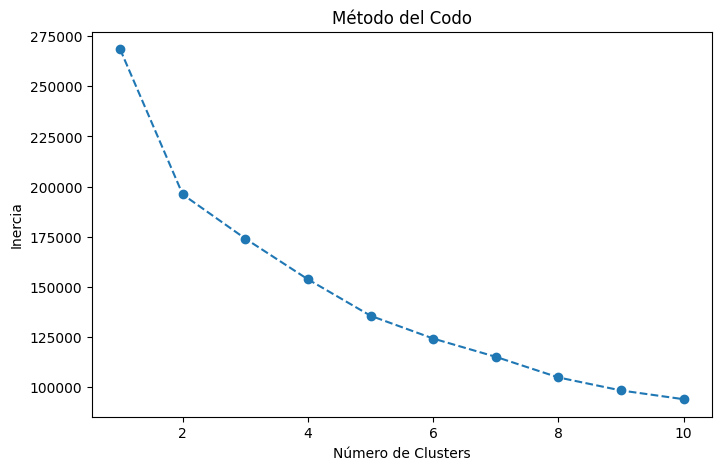

In [ ]:
# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

In [ ]:
# 2. Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(df_scaled, clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")

NameError: name 'calinski_harabasz_score' is not defined

In [ ]:
# 3. Davies-Bouldin Index (mientras más bajo, mejor)
davies_bouldin = davies_bouldin_score(df_scaled, clusters)
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")

NameError: name 'davies_bouldin_score' is not defined